In [25]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import os

import utils
from vcm.catalog import catalog
import fv3viz
import vcm

In [17]:
slmsk = catalog["landseamask/c48"].read()
grid = catalog["grid/c48"].read()


In [9]:
nudged_rundir = "gs://vcm-ml-experiments/n2f-pire-sfc-updates/2022-01-21/nudged-run/fv3gfs_run/"

nudging_tendencies = intake.open_zarr(os.path.join(nudged_rundir, "nudging_tendencies.zarr")).to_dask()
col_int_nudging_tendencies = intake.open_zarr(os.path.join(nudged_rundir, "diags.zarr")).to_dask() \
    .resample(time="3H").nearest()


In [13]:
seasonal_col_int_nudging_tendencies = utils.seasonal_avg(col_int_nudging_tendencies).load()


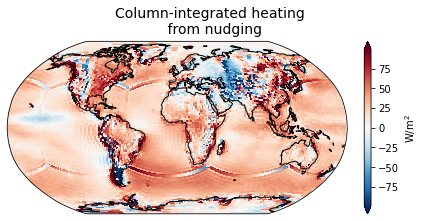

In [44]:
fv3viz.plot_cube(
    seasonal_col_int_nudging_tendencies.merge(grid).mean("season"),
    "column_heating_due_to_nudging",
    cbar_label="W/m$^2$"
)
plt.suptitle("Column-integrated heating \n from nudging", fontsize=14, y=0.92)
plt.tight_layout()
plt.savefig("figures/png/nudging-col-int-heating.png", dpi=150)
plt.savefig("figures/pdf/nudging-col-int-heating.pdf", dpi=150)


(<Figure size 936x216 with 5 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f4ba1ddb760>,
       dtype=object),
 <xarray.plot.facetgrid.FacetGrid at 0x7f4ba2da2f10>)

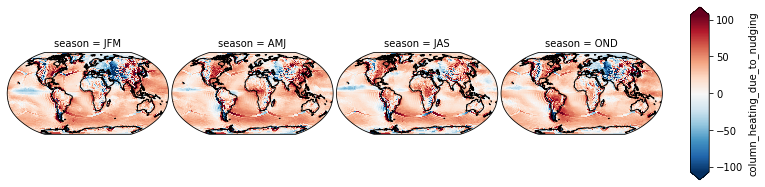

In [19]:
fv3viz.plot_cube(
    seasonal_col_int_nudging_tendencies.merge(grid),
    "column_heating_due_to_nudging",
    col="season"
)

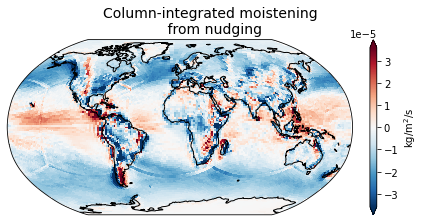

In [45]:
fv3viz.plot_cube(
    seasonal_col_int_nudging_tendencies.merge(grid).mean("season"),
    "net_moistening_due_to_nudging",
    cbar_label="kg/m$^2$/s"
)
plt.suptitle("Column-integrated moistening \n from nudging", fontsize=14, y=0.92)
plt.tight_layout()
plt.savefig("figures/png/nudging-col-int-moistening.png", dpi=150)
plt.savefig("figures/pdf/nudging-col-int-moistening.pdf", dpi=150)

(<Figure size 936x216 with 5 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f4ba3c74f70>,
       dtype=object),
 <xarray.plot.facetgrid.FacetGrid at 0x7f4ba33d2310>)

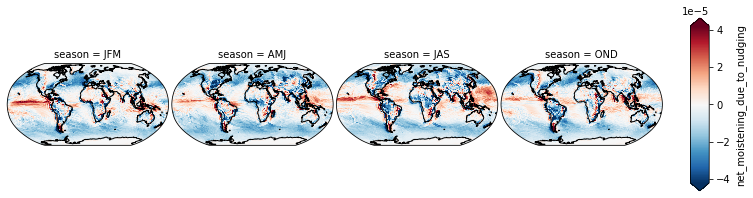

In [21]:
fv3viz.plot_cube(
    seasonal_col_int_nudging_tendencies.merge(grid),
    "net_moistening_due_to_nudging",
    col="season"
)

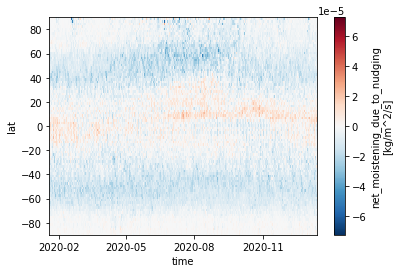

In [28]:
vcm.zonal_average_approximate(
    grid.lat,
    col_int_nudging_tendencies["net_moistening_due_to_nudging"]
).plot(x="time")

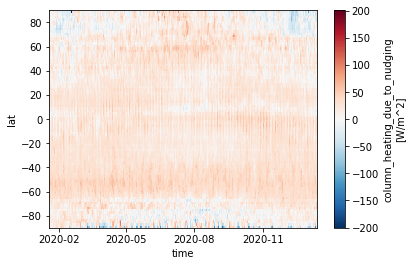

In [29]:
vcm.zonal_average_approximate(
    grid.lat,
    col_int_nudging_tendencies["column_heating_due_to_nudging"]
).plot(x="time")

In [8]:
nudging_tendencies

<xarray.Dataset>
Dimensions:                                                          (time: 2880, tile: 6, z: 79, y: 48, x: 48, y_interface: 49, x_interface: 49)
Coordinates:
  * time                                                             (time) object ...
Dimensions without coordinates: tile, z, y, x, y_interface, x_interface
Data variables:
    air_temperature_tendency_due_to_nudging                          (time, tile, z, y, x) float64 dask.array<chunksize=(8, 6, 79, 48, 48), meta=np.ndarray>
    pressure_thickness_of_atmospheric_layer_tendency_due_to_nudging  (time, tile, z, y, x) float64 dask.array<chunksize=(8, 6, 79, 48, 48), meta=np.ndarray>
    specific_humidity_tendency_due_to_nudging                        (time, tile, z, y, x) float64 dask.array<chunksize=(8, 6, 79, 48, 48), meta=np.ndarray>
    x_wind_tendency_due_to_nudging                                   (time, tile, z, y_interface, x) float64 dask.array<chunksize=(8, 6, 79, 49, 48), meta=np.ndarray>
    y_wind_tendency_due_to_nudging                                   (time, tile, z, y, x_interface) float64 dask.array<chunksize=(8, 6, 79, 48, 49), meta=np.ndarray>

In [7]:
col_int_nudging_tendencies

<xarray.Dataset>
Dimensions:                           (time: 34560, tile: 6, y: 48, x: 48)
Coordinates:
  * time                              (time) object 2020-01-19 00:15:00 ... 2...
Dimensions without coordinates: tile, y, x
Data variables:
    column_heating_due_to_nudging     (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>
    net_mass_tendency_due_to_nudging  (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>
    net_moistening_due_to_nudging     (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>
    physics_precip                    (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>
    total_precipitation_rate          (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>
    water_vapor_path                  (time, tile, y, x) float64 dask.array<chunksize=(96, 6, 48, 48), meta=np.ndarray>